In [5]:
import pandas as pd

In [6]:
# First check the data characteristics manually

In [7]:
df = pd.read_csv(r'./data/Mall_Customers_Dataset.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.shape

(200, 5)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# These simple probabilistic variables gives us a little insight about the customers and the possible distribution

In [12]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# It's better to check dataset for null data and remove them

In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# It's the time to check the data visually

In [19]:
import matplotlib.pyplot as plot
import seaborn as sns

In [39]:
plot.style.use("classic")

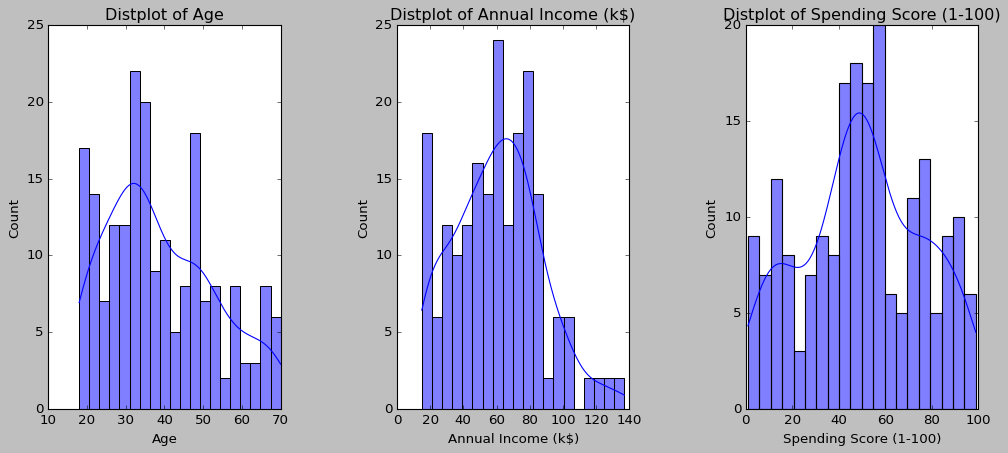

In [40]:
# Define the figure size and the variable names you want to plot
plot.figure(figsize=(15, 6))
columns_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Loop through the list of columns and create a subplot for each one
for index, column_name in enumerate(columns_to_plot, start=1):
    plot.subplot(1, 3, index)  # Defines a 1x3 grid of subplots, and selects the nth subplot
    plot.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the spacing between the plots
    sns.histplot(df[column_name], bins=20, kde=True)  # Use sns.histplot with Kernel Density Estimate (KDE)
    plot.title(f'Distplot of {column_name}')  # Use f-string for formatting

    # Save each individual plot
    # plot.savefig(f'output/{column_name.replace(" ", "_")}.jpg', format='jpg', dpi=150)
    # plot.close()


# Adjust the spacing between the plots
plot.subplots_adjust(hspace=0.5, wspace=0.5)

# Save the entire figure
plot.savefig('output/all_columns_distplot.jpg', format='jpg', dpi=150)

# Display the plots
plot.show()


In [41]:
# Check the genders as well

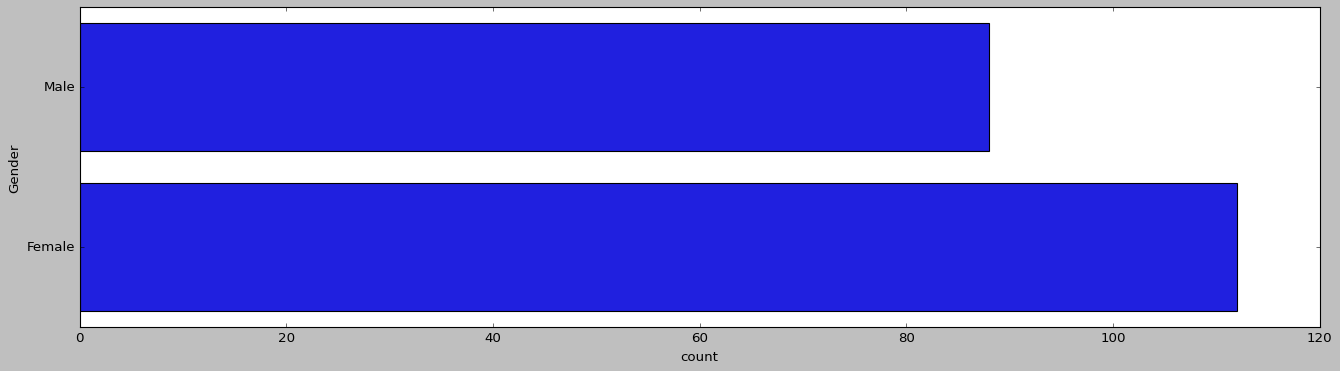

In [42]:
plot.figure(1, figsize= (20, 5))
sns.countplot(y = "Gender", data=df)
plot.savefig('output/genders.jpg', format='jpg', dpi=150)
plot.show()

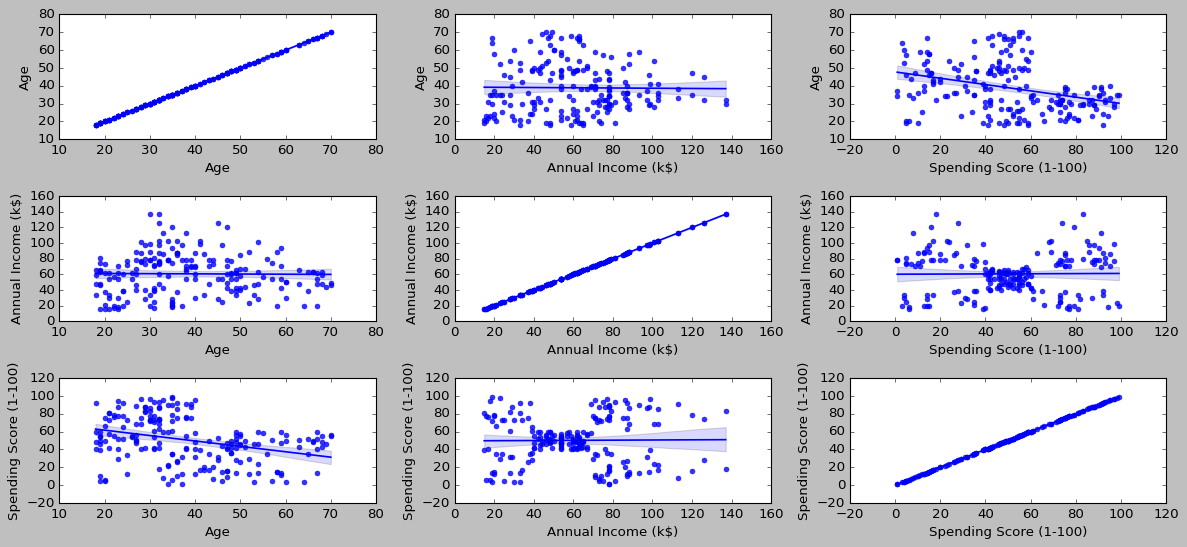

In [44]:
# Define the dimensions of the plot grid
grid_size = 3
variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
total_plots = len(variables) ** 2

# Create a figure with subplots in a grid
fig, axes = plot.subplots(grid_size, grid_size, figsize=(15, 7))
plot.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the spacing between the plots

# Loop through the rows and columns and fill in the subplots
for i, var_y in enumerate(variables):
    for j, var_x in enumerate(variables):
        ax = axes[i, j]
        sns.regplot(x=var_x, y=var_y, data=df, ax=ax)
        # Format the y-axis label to handle cases where there are spaces
        y_label = ' '.join(var_y.split()) if len(var_y.split()) > 1 else var_y
        ax.set_ylabel(y_label)
        ax.set_xlabel(var_x)

# Tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plot.tight_layout()
plot.savefig('output/variable_relations.jpg', format='jpg', dpi=150)
plot.show()


In [ ]:
# Check the distribution of characteristic based on the genders

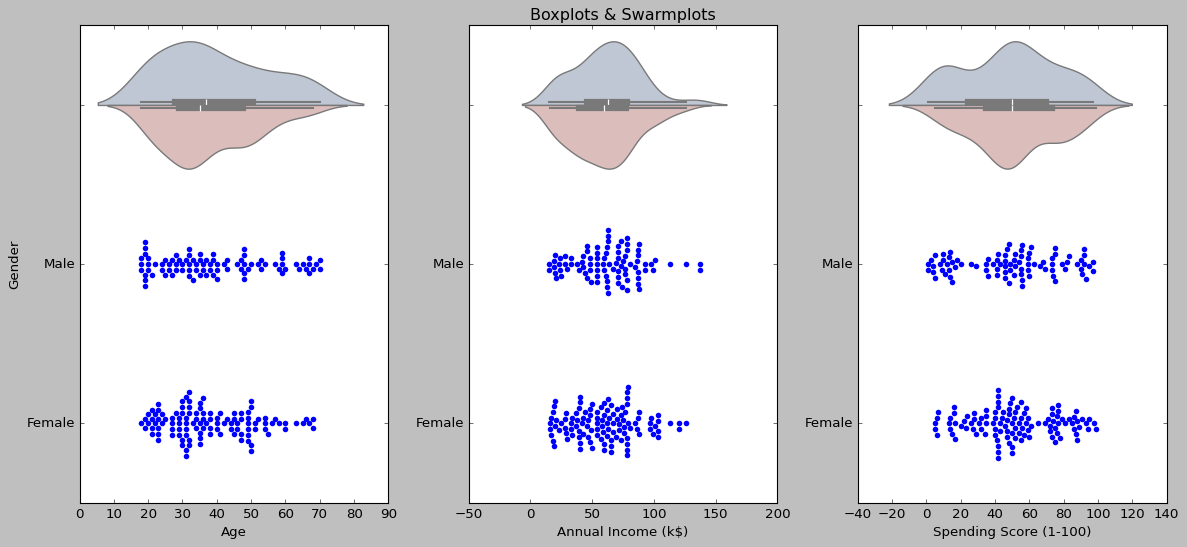

In [46]:
# Define the columns to plot and initialize the figure with subplots
columns_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axes = plot.subplots(1, 3, figsize=(15, 7))  # 1 row, 3 columns

# Use `enumerate` for getting both the column index and the column name
for index, column in enumerate(columns_to_plot):
    # Create violin and swarm plots on the same axes for comparison
    sns.violinplot(x=column, hue='Gender', data=df, palette='vlag', split=True, ax=axes[index], legend=False)
    sns.swarmplot(x=column, y='Gender', data=df, ax=axes[index])

    # Label the y-axis only for the first subplot
    if index == 0:
        axes[index].set_ylabel('Gender')
    else:
        axes[index].set_ylabel('')

    # Add a title to the middle subplot
    if index == 1:
        axes[index].set_title('Boxplots & Swarmplots')

# Adjust the spacing between the plots just once since they share the same figure
plot.subplots_adjust(hspace=0.5, wspace=0.5)
plot.tight_layout()  # This will make sure to adjust subplots to fit into the figure area.

# Display the plots
plot.savefig('output/characteristics_distribution.jpg', format='jpg', dpi=150)
plot.show()
